<a href="https://colab.research.google.com/github/PingPingE/Deeplearning_with_Keras/blob/master/day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오토인코더

비지도 학습이란?)
- 데이터에 대한 정답이 주어지지 않은 상태에서 컴퓨터를 학습시키는 방법론
- 특정 input에 대해 올바른 정답이 없는 데이터 집합이 주어지는 경우의 학습
- 데이터안에서 어떤 특정한 관계를 찾아내는 데 목적이 있다.

방법)
- 데이터의 형태, 분포로 학습을 진행
- 숨겨진 특징이나 구조를 발견하는 사용된다
- 종류: Clustering, K-means, Expectation maximization

오토인코더)
- 비지도 학습 방법론에서 주로 사용되는 구조
- 출력값을 입력값의 근사로 하는 함수를 학습함
- 인코더를 통해 입력 데이터에 대한 특징을 추출하고, 디코더를 통해 원본 데이터를 재구성하는 학습방식
- 종류: Variational Autoencoder, Denoising Autoencoder
- 원리:
  1. 인코딩 과정에서 입력된 데이터의 핵심 Feature정보만 Hidden layer에서 학습하고, 나머지 정보는 손실시킨다.
  2. 디코딩 과정에서 Hidden layer의 출력값을 뽑았을 때 완벽한 값 복사가 아닌 입력값의 근사치가 된다.
  3. 출력값이 입력값과 최대한 같아지도록 튜닝함으로써, Feature를 잘 추출할 수 있게 하는 것이 오토인코더의 원리
  -> 입력값과 출력값이 최대한 비슷하게 만드는 가중치를 찾아낸다.

오토인코더의 학습과정)
1. 입력값과 Hidden layer의 가중치를 계산해 Sigmoid함수를 통과시킨다.
2. 1번의 결과물과 출력 레이어의 가중치를 계산해 Sigmoid함수를 통과시킨다.
3. 2번의 값을 이용해 MSE(Mean Squared Error)를 계산한다.
4. 3번의 결과로 나온 Loss값을 SGD로 최적화한다.
5. 오류역전파를 사용하여 가중치를 갱신한다.


In [1]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.mnist.load_data()

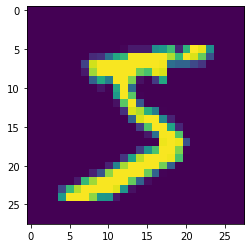

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [3]:
X_train.shape

(60000, 28, 28)

## PCA

In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
from sklearn.decomposition import PCA

train1 = X_train.reshape(-1, 28*28)#전체개수, 특성 수
test1 = X_test.reshape(-1, 28*28)
pca = PCA(32)
pca.fit(train1)
train_pca  = pca.transform(train1)
test_pca= pca.transform(test1)
pred1 = pca.inverse_transform(test_pca) #변환된 근사행렬을 원래의 차원으로 복귀
pred1.shape

(10000, 784)

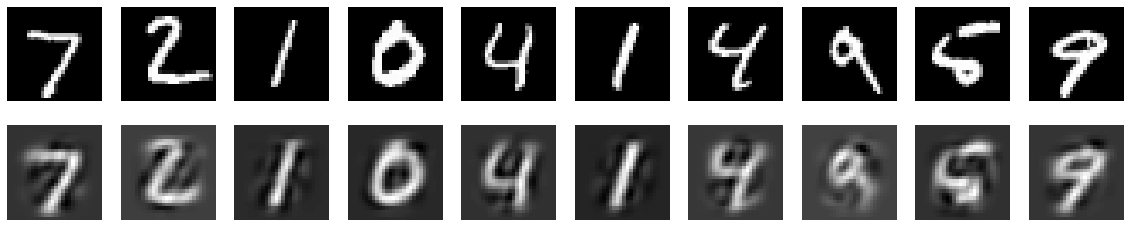

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2,10, (i+1))
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.gray()

  plt.subplot(2,10,(i+1+10))
  plt.imshow(pred1[i].reshape(28,28))
  plt.axis('off')
  plt.gray()

## DNN

In [7]:
X_train = X_train.reshape(-1,28*28)
model = tf.keras.Sequential([tf.keras.layers.Dense(784, activation="relu", input_shape=(784,)),
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dense(784, activation="sigmoid")                   
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(X_train, X_train, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0501 - accuracy: 0.0091
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0162 - accuracy: 0.0121
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0114 - accuracy: 0.0122
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0096 - accuracy: 0.0128
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0085 - accuracy: 0.0140
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0077 - accuracy: 0.0134
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0072 - accuracy: 0.0139
Epoch 8/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0068 - accuracy: 0.0138
Epoch 9/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0066 - accuracy: 0.0138
Epoch 10/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0063 - accura

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_test = X_test.reshape(-1,28*28)
X_test.shape

(10000, 784)

In [12]:
pred2= model.predict(X_test)

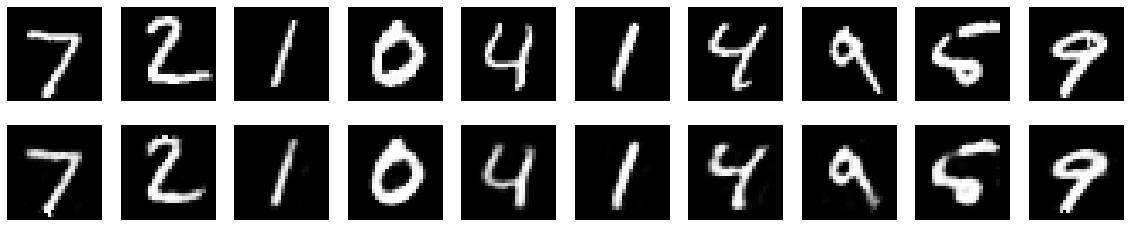

In [13]:
plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2, 10, (i+1))
  plt.imshow(X_test[i].reshape(28,28))
  plt.axis('off')
  plt.gray()

  plt.subplot(2, 10, (i+1+10))
  plt.imshow(pred2[i].reshape(28, 28))
  plt.axis('off')
  plt.gray()

## CNN

In [16]:
# CNN 사용하기 (개수, 이미지크기, 이미지크기, 채널)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
                             #인코딩
    tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), strides=(2,2), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(2,2), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(7 * 7 * 64),
    #디코딩
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2,2), strides=(2,2), activation="relu", padding="same"),    
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(2,2), strides=(2,2), activation="relu", padding="same")
])

model.compile(optimizer="adam", loss="mse")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_6 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)       

In [15]:
# 모델 학습
model.fit(X_train,X_train, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 20s 86ms/step - loss: 0.0339
Epoch 2/10
235/235 [==============================] - 20s 85ms/step - loss: 0.0078
Epoch 3/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0055
Epoch 4/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0047
Epoch 5/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0042
Epoch 6/10
235/235 [==============================] - 20s 85ms/step - loss: 0.0039
Epoch 7/10
235/235 [==============================] - 20s 85ms/step - loss: 0.0037
Epoch 8/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0036
Epoch 9/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0035
Epoch 10/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0034


In [20]:
pred3 = model.predict(X_test)

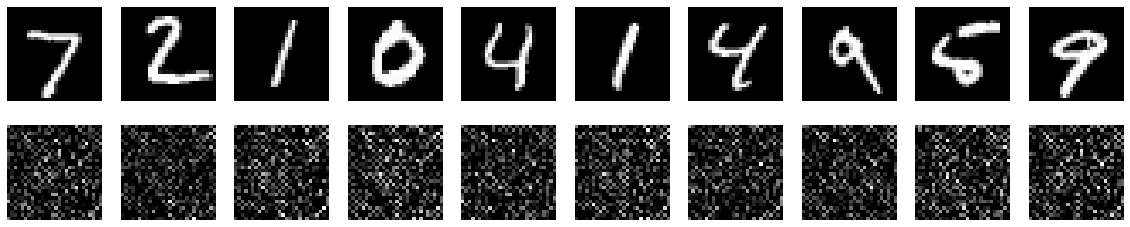

In [21]:
plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2, 10, (i+1))
  plt.imshow(X_test[i].reshape(28,28))
  plt.axis('off')
  plt.gray()

  plt.subplot(2, 10, (i+1+10))
  plt.imshow(pred3[i].reshape(28, 28))
  plt.axis('off')
  plt.gray()

## 오토인코더 활성화 함수

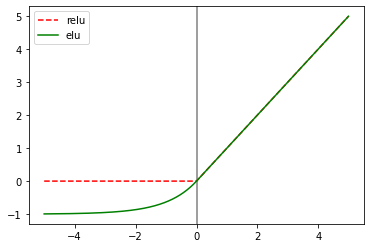

In [23]:
# 오토인코더 활성화 함수
import math
import numpy as np

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

# plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()


In [24]:
X_train =X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

In [26]:
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_8 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 32)       

In [27]:
# 엔코딩 부분만 가져오기
model1 = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)

In [29]:
# 참고 : 층을 추가할 경우
output = tf.keras.layers.Dense(10, activation='elu')(model.layers[3].output)

In [30]:
model2 = tf.keras.Model(inputs=model.input, outputs=output)
model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 209,834
Trainable params: 209,834
Non-trainable params: 0
________________________________________________

In [31]:
# 예측값 확인
pred4 = model1.predict( X_train)
pred4.shape

(60000, 64)

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=30, random_state=42)
kmeans.fit(pred4) # 예측값을 KMeans에 적용 
# 60000개의 데이터를 10개의 그룹으로 분류함.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [33]:
#분류된 항목 확인
kmeans.labels_

array([4, 5, 4, ..., 2, 9, 6], dtype=int32)

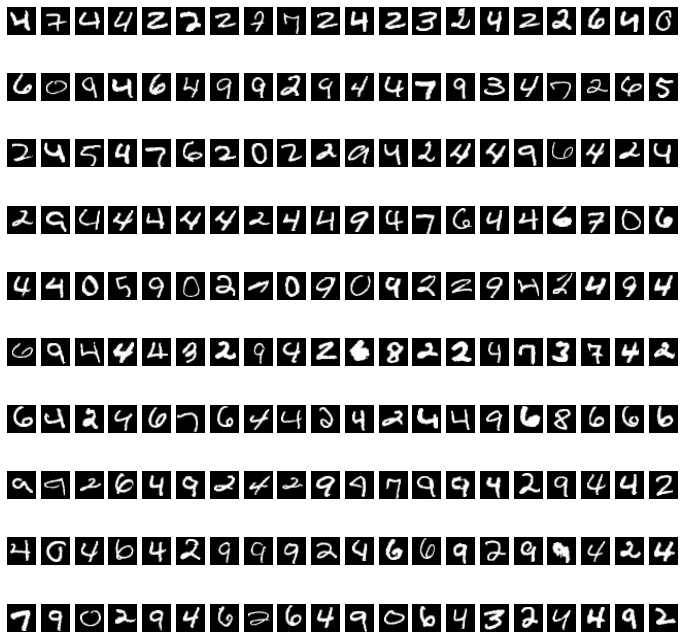

In [38]:
import matplotlib.pyplot as plt

labels = kmeans.labels_
plt.figure(figsize=(12,12))

k = 0
for i in range(60000):
  if labels[i] == 0:
    k = k + 1
    plt.subplot(10, 20, k)
    plt.imshow( X_train[i].reshape(28,28) )
    plt.axis('off')

    if k>= 200:
      break
  